<a href="https://colab.research.google.com/github/samp3209/Sandboxes/blob/main/MLSandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Decision Tree Regressor

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

train = pd.read_fwf('housing_train.txt', header=None)
test = pd.read_fwf('housing_test.txt', header=None)


In [15]:
train.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
test.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [16]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
normtrain = train
normtrain['B'] = (train['B'] - train['B'].mean()) / train['B'].std()
normtrain['LSTAT'] = (train['LSTAT'] - train['LSTAT'].mean()) / train['LSTAT'].std()
normtrain['TAX'] = (train['TAX'] - train['TAX'].mean()) / train['TAX'].std()
normtrain['PTRATIO'] = (train['PTRATIO'] - train['PTRATIO'].mean()) / train['PTRATIO'].std()
normtrain['DIS'] = (train['DIS'] - train['DIS'].mean()) / train['DIS'].std()
normtrain['AGE'] = (train['AGE'] - train['AGE'].mean()) / train['AGE'].std()


In [18]:
normtest = test
normtest['B'] = (test['B'] - test['B'].mean()) / test['B'].std()
normtest['LSTAT'] = (test['LSTAT'] - test['LSTAT'].mean()) / test['LSTAT'].std()
normtest['TAX'] = (test['TAX'] - test['TAX'].mean()) / test['TAX'].std()
normtest['PTRATIO'] = (test['PTRATIO'] - test['PTRATIO'].mean()) / test['PTRATIO'].std()
normtest['DIS'] = (test['DIS'] - test['DIS'].mean()) / test['DIS'].std()
normtest['AGE'] = (test['AGE'] - test['AGE'].mean()) / test['AGE'].std()
normtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.84054,0.0,8.14,0,0.538,5.599,0.495301,0.286837,4,-0.927422,0.917251,-0.189158,0.403705,13.9
1,0.67191,0.0,8.14,0,0.538,5.813,0.648269,0.383112,4,-0.927422,0.917251,0.426573,0.158846,16.6
2,0.95577,0.0,8.14,0,0.538,6.047,0.598388,0.286329,4,-0.927422,0.917251,-0.164348,0.514611,14.8
3,0.77299,0.0,8.14,0,0.538,6.495,0.784609,0.286880,4,-0.927422,0.917251,0.519276,-0.130662,18.4
4,1.00245,0.0,8.14,0,0.538,6.674,0.548507,0.195558,4,-0.927422,0.917251,0.454652,-0.248771,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.10574,0.0,27.74,0,0.609,5.983,0.930926,-0.808218,4,1.663812,0.530368,0.537464,0.628398,13.6
70,0.11132,0.0,27.74,0,0.609,5.983,0.422143,-0.705847,4,1.663812,0.530368,0.594377,-0.051444,20.1
71,0.17331,0.0,9.69,0,0.585,5.707,-0.558843,-0.590774,6,-0.388650,0.143484,0.594377,-0.244450,21.8
72,0.27957,0.0,9.69,0,0.585,5.926,-0.937936,-0.590774,6,-0.388650,0.143484,0.594377,-0.016875,24.5


In [19]:
x = normtrain[['AGE', 'CRIM', 'INDUS', 'RM', 'NOX', 'TAX', 'PTRATIO', 'DIS', 'B', 'LSTAT']]
y = normtrain['MEDV']

testx = normtest[['AGE', 'CRIM', 'INDUS', 'RM', 'NOX', 'TAX', 'PTRATIO', 'DIS', 'B', 'LSTAT']]
testy = normtest['MEDV']

In [20]:
normtrain[normtrain.columns[:]].corr()['MEDV'][:]

,MEDV
CRIM,-0.366248
ZN,0.351848
INDUS,-0.467631
CHAS,0.189079
NOX,-0.426741
RM,0.693347
AGE,-0.350788
DIS,0.231475
RAD,0.083400
TAX,-0.464551


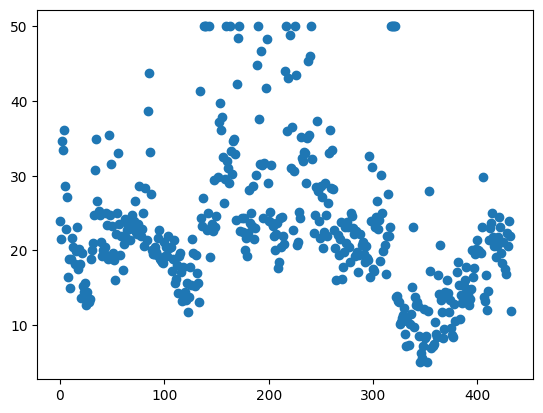

In [21]:
plt.scatter(normtrain.index, normtrain['MEDV'])
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree1 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree1.fit(x, y)

y_pred = tree1.predict(testx)
mse = mean_squared_error(testy, y_pred)
print(mse)

28.784679538411982


In [23]:
from xgboost import XGBRegressor

tree2 = XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.05)
tree2.fit(x, y)

y_pred = tree2.predict(testx)
mse = mean_squared_error(testy, y_pred)
print(f'test MSE: %.3f' % mse)
y_pred = tree2.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'train MSE: %.3f' % mse)

test MSE: 13.714
train MSE: 4.004


# Decision Tree Regressor from Scratch

In [30]:
import numpy as np
import pandas as pd
from scipy import stats


class node:
  def __init__(self, value=None, left=None, right=None, threshold=None, info=None, feature=None):
    self.value = value
    self.left = left
    self.right = right
    self.threshold = threshold
    self.info = info
    self.feature = feature

class decision_tree_regressor:

  def __init__(self, max_depth=3, min_samples_split=2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split

  def split(self, threshold, df, feature):
    left = df[df[feature] <= threshold]
    right = df[df[feature] > threshold]
    return left, right

  def mse(self, y):
      return np.mean((y - np.mean(y)) ** 2)

  def mse_reduction(self, parent, left, right):
      mse_parent = self.mse(parent)
      mse_left = self.mse(left)
      mse_right = self.mse(right)
      weighted_mse = (len(left) / len(parent)) * mse_left + (len(right) / len(parent)) * mse_right
      return mse_parent - weighted_mse

  def best_split(self, df):
      best_info = -np.inf
      best_threshold = None
      best_left = None
      best_right = None
      best_feature = None

      for feature in df.columns[:-1]:
          values = sorted(df[feature].unique())
          if len(values) <= 1:
              continue
          thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values) - 1)]

          for threshold in thresholds:
              left, right = self.split(threshold, df, feature)
              if len(left) < self.min_samples_split or len(right) < self.min_samples_split:
                  continue
              info = self.mse_reduction(df['MEDV'], left['MEDV'], right['MEDV'])
              if info > best_info:
                  best_info = info
                  best_threshold = threshold
                  best_left = left
                  best_right = right
                  best_feature = feature
      return best_info, best_threshold, best_left, best_right, best_feature

  def build_tree(self, df, depth=0):
      x, y = df.iloc[:, :-1], df.iloc[:, -1]
      n_samples, n_features = x.shape
      info, threshold, left, right, feature = self.best_split(df)
      if n_samples >= self.min_samples_split and depth < self.max_depth and info > 0:
        left = self.build_tree(left, depth + 1)
        right = self.build_tree(right, depth + 1)
        return node(left=left, right=right, threshold=threshold, info=info, feature=feature)
      leaf_value = np.mean(y)
      return node(value=leaf_value)

  def predict(self, x):
    preds = []
    for i in x.iterrows():
        pred = self.make_prediction(i[1], self.root)
        preds.append(pred)
    return preds

  def make_prediction(self, x, node):
    if node.value is not None:
      return node.value
    else:
      if x[node.feature] <= node.threshold:
        return self.make_prediction(x, node.left)
      else:
        return self.make_prediction(x, node.right)

  def fit(self, x, y):
    df = pd.concat([x, y], axis=1)
    self.root = self.build_tree(df)


In [29]:
tree = decision_tree_regressor(max_depth=3, min_samples_split=2)
tree.fit(x, y)
y_pred_test = tree.predict(testx)
mse = mean_squared_error(testy, y_pred_test)
print(f'test MSE: %.3f' % mse)
y_pred_train = tree.predict(x)
mse = mean_squared_error(y, y_pred_train)
print(f'train MSE: %.3f' % mse)


test MSE: 35.412
train MSE: 18.013


# Spam Dataset Classifier

# Decision Tree Classifier

In [31]:
class Node:
    def __init__(self, value=None, left=None, right=None, threshold=None, info=None, feature=None):
        self.value = value
        self.left = left
        self.right = right
        self.threshold = threshold
        self.info = info
        self.feature = feature

class decision_tree_classifier:

    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def split(self, threshold, df, feature):
        left = df[df[feature] <= threshold]
        right = df[df[feature] > threshold]
        return left, right

    def entropy(self, y):
        labels, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs + 1e-9))

    def info_gain(self, parent, left, right):
        H_parent = self.entropy(parent)
        H_left = self.entropy(left)
        H_right = self.entropy(right)
        weight_l = len(left) / len(parent)
        weight_r = len(right) / len(parent)
        return H_parent - (weight_l * H_left + weight_r * H_right)

    def best_split(self, df):
        best_info = -np.inf
        best_threshold = None
        best_left = None
        best_right = None
        best_feature = None

        for feature in df.columns[:-1]:
            values = sorted(df[feature].unique())
            if len(values) <= 1:
                continue
            thresholds = [(values[i] + values[i + 1]) / 2 for i in range(len(values) - 1)]
            for threshold in thresholds:
                left, right = self.split(threshold, df, feature)
                if len(left) < self.min_samples_split or len(right) < self.min_samples_split:
                    continue
                info = self.info_gain(df[df.columns[-1]], left[df.columns[-1]], right[df.columns[-1]])
                if info > best_info:
                    best_info = info
                    best_threshold = threshold
                    best_left = left
                    best_right = right
                    best_feature = feature

        return best_info, best_threshold, best_left, best_right, best_feature

    def build_tree(self, df, depth=0):
        y = df.iloc[:, -1]
        if depth < self.max_depth and len(y) >= self.min_samples_split:
            info, threshold, left, right, feature = self.best_split(df)
            if info > 0:
                left_node = self.build_tree(left, depth + 1)
                right_node = self.build_tree(right, depth + 1)
                return Node(left=left_node, right=right_node, threshold=threshold, info=info, feature=feature)

        most_common = stats.mode(y)[0][0]
        return Node(value=most_common)

    def fit(self, x, y):
        df = pd.concat([x, y], axis=1)
        self.root = self.build_tree(df)

    def make_prediction(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.make_prediction(x, node.left)
        else:
            return self.make_prediction(x, node.right)

    def predict(self, x):
        return [self.make_prediction(row, self.root) for _, row in x.iterrows()]

In [38]:
from sklearn.metrics import accuracy_score

spam = pd.read_csv("spambase.data", header=None)
spam.columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'spam_label'
]


In [40]:
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0
